In [143]:
import os
import json
import pandas as pd
from tqdm import tqdm 
import re
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np
style.use('ggplot')

In [155]:
dirs = ['biorxiv_medrxiv/biorxiv_medrxiv','comm_use_subset/comm_use_subset','noncomm_use_subset/noncomm_use_subset','pmc_custom_license/pmc_custom_license']

In [156]:
docs = []
for  d in dirs:
    print(d)
    for file in tqdm(os.listdir(d)):
#         print(file)
        file_path = d+'/'+file
        j = json.load(open(file_path,"rb"))
#         print(j)
        
        title = j['metadata']['title']
        try:
            abstract = j['abstract'][0]
        except:
            abstract = ""
        full_text = ""
        for text in j['body_text']:
#             print(text['text'])
            full_text += text['text']+'\n\n'
#         print(full_text)
        docs.append([title,abstract,full_text])
#         break
#         for key in j:
#             print(key)
#         print(j['metadata'])
#         for k in j['metadata']:
#             print(k)
#         break

  5%|████▎                                                                           | 43/803 [00:00<00:01, 425.75it/s]

biorxiv_medrxiv/biorxiv_medrxiv


  0%|                                                                                 | 5/9000 [00:00<03:32, 42.37it/s]

comm_use_subset/comm_use_subset


  0%|▏                                                                                | 4/1973 [00:00<00:51, 38.10it/s]

noncomm_use_subset/noncomm_use_subset


  0%|▎                                                                                | 6/1426 [00:00<00:25, 55.56it/s]

pmc_custom_license/pmc_custom_license


100%|██████████████████████████████████████████████████████████████████████████████| 1426/1426 [00:25<00:00, 55.00it/s]


In [157]:
df = pd.DataFrame(docs, columns=['title','abstract','full_text'])

In [158]:
print(df.head())

                                               title  \
0  The RNA pseudoknots in foot-and-mouth disease ...   
1  Healthcare-resource-adjusted vulnerabilities t...   
2  Real-time, MinION-based, amplicon sequencing f...   
3  Assessing spread risk of Wuhan novel coronavir...   
4  TWIRLS, an automated topic-wise inference meth...   

                                            abstract  \
0  {'text': 'word count: 194 22 Text word count: ...   
1                                                      
2  {'text': 'Infectious bronchitis (IB) causes si...   
3  {'text': 'Background: A novel coronavirus (201...   
4  {'text': 'Faced with the current large-scale p...   

                                           full_text  
0  VP3, and VP0 (which is further processed to VP...  
1  The 2019-nCoV epidemic has spread across China...  
2  Infectious bronchitis (IB), which is caused by...  
3  In December 2019, a cluster of patients with p...  
4  The sudden outbreak of the new coronavirus (SA..

In [159]:
incubation = df[df['full_text'].str.contains('incubation')]
print(incubation.head())

                                                title  \
1   Healthcare-resource-adjusted vulnerabilities t...   
7   Carbon Nanocarriers Deliver siRNA to Intact Pl...   
9   A hidden gene in astroviruses encodes a cell-p...   
10  Live-cell single RNA imaging reveals bursts of...   
12  Self-assembly of the RZZ complex into filament...   

                                             abstract  \
1                                                       
7   {'text': 'Post-transcriptional gene silencing ...   
9   {'text': 'Human astroviruses are small nonenve...   
10  {'text': 'Ribosomal frameshifting during the t...   
12                                                      

                                            full_text  
1   The 2019-nCoV epidemic has spread across China...  
7   siRNA without relying on plant transformation,...  
9   Humans astroviruses (HAstVs) belong to genus M...  
10  Frameshifting is a fundamental biological proc...  
12  To examine the role of the kin

In [160]:
texts = incubation['full_text'].values

In [161]:
incubation_times = []

[3.0, 28.0, 14.0, 14.0, 4.0, 1.0, 5.0, 1.0, 5.0, 1.0, 14.0, 8.0, 1.0, 1.0, 7.0, 5.0, 42.0, 2.0, 5.0, 6.0, 5.0, 5.0, 5.0, 1.0, 55.0, 9.0, 27.0, 55.0, 4.0, 2.0, 6.0, 8.0, 24.0, 7.0, 14.0, 2.0, 2.0, 9.0, 22.0, 22.0, 22.0, 4.0, 42.0, 3.0, 4.0, 7.0, 2.0, 10.0, 14.0, 6.0, 4.0, 0.0, 0.0, 14.0, 24.0, 9.0, 9.0, 14.0, 3.0, 5.0, 5.0, 6.0, 2.0, 6.0, 18.0, 3.0, 7.0, 5.0, 7.0, 5.0, 0.0, 7.0, 7.0, 0.0, 14.0, 8.0, 2.0, 8.0, 15.0, 5.0, 17.0, 7.0, 24.0, 14.0, 0.0, 89.0, 13.0, 2.0, 5.0, 6.0, 5.0, 14.0, 14.0, 1.0, 8.0, 8.0, 21.0, 0.0, 3.0, 3.0, 3.0, 4.0, 5.0, 24.0, 38.0, 9.0, 20.0, 20.0, 5.0, 14.0, 3.0, 1.0, 9.0, 1.0, 9.0, 7.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, 10.0, 2.0, 2.0, 7.0, 2.0, 2.0, 2.0, 7.0, 4.0, 11.0, 11.0, 21.0, 2.0, 2.0, 0.0, 3.0, 2.0, 4.0, 4.0, 7.0, 10.0, 3.0, 5.0, 4.0, 14.0, 7.0, 4.0, 3.0, 8.0, 4.0, 50.0, 3.0, 2.0, 6.0, 2.0, 4.0, 3.0, 1.0, 3.0, 42.0, 21.0, 42.0, 12.0, 14.0, 6.0, 3.0, 3.0, 4.0, 5.0, 7.0, 6.0, 6.0, 5.0, 14.0, 5.0, 14.0, 5.0, 14.0, 14.0, 15.0, 94.0, 56.0, 56.0, 3.0, 8.0, 4.0,

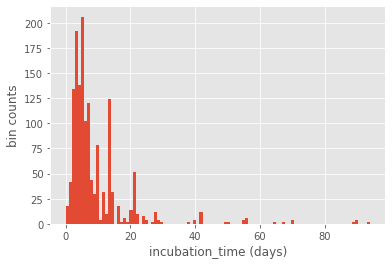

In [163]:
for t in texts:
    for sentence in t.split(". "):
        if 'incubation' in sentence:
#             print(sentence)
            single_day = re.findall(r'\d{1,2} day',sentence)
            if len(single_day) ==1:
#                 print(single_day[0])
#                 print(sentence)
                num = single_day[0].split(" ")
#                 print(num)
#                 break
#                 incubation_times.append(float(single_day[0]))
#                 print(num[0])
                incubation_times.append(float(num[0]))
#                 print()
#                 print()
#     break
print(incubation_times)
print(len(incubation_times))
print(f'The mean projected incubation time is {np.mean(incubation_times)} days')
plt.hist(incubation_times, bins =100)
plt.ylabel('bin counts')
plt.xlabel('incubation_time (days)')
plt.show()